In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# based on Department of Health
data = {
    'year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],  # years
    'Respiratory Illness Cases': [161374, 165146, 169407,188101, 192362, 181338, 191554, 123206, 108647, 180445]  # number of cases
}
health_data = pd.DataFrame(data)
health_data

,year,Respiratory Illness Cases
0,2015,161374
1,2016,165146
2,2017,169407
3,2018,188101
4,2019,192362
5,2020,181338
6,2021,191554
7,2022,123206
8,2023,108647
9,2024,180445


In [3]:
air_pollution = pd.read_csv('combined_air_quality_data.csv')
air_pollution

,date,pm25,pm10,o3,no2,district
0,2024/11/1,71,29,17,34,Wan Chai
1,2024/11/2,69,33,26,29,Wan Chai
2,2024/11/3,71,46,39,32,Wan Chai
3,2024/11/4,95,42,27,35,Wan Chai
4,2024/11/5,94,48,34,36,Wan Chai
...,...,...,...,...,...,...
52479,2015/3/31,,,11,18,Yuen Long
52480,2014/4/9,,,38,19,Yuen Long
52481,2014/4/10,,,24,22,Yuen Long
52482,2014/4/11,,,21,22,Yuen Long


In [4]:
air_pollution['date'] = pd.to_datetime(air_pollution['date'], format='%Y/%m/%d')
print(air_pollution.head())

        date pm25 pm10   o3  no2  district
0 2024-11-01   71   29   17   34  Wan Chai
1 2024-11-02   69   33   26   29  Wan Chai
2 2024-11-03   71   46   39   32  Wan Chai
3 2024-11-04   95   42   27   35  Wan Chai
4 2024-11-05   94   48   34   36  Wan Chai


In [5]:
air_pollution.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'district'], dtype='object')

In [6]:
print(air_pollution.dtypes)

date        datetime64[ns]
pm25                object
pm10                object
o3                  object
no2                 object
district            object
dtype: object


In [7]:
air_pollution['pm25'] = pd.to_numeric(air_pollution['pm25'], errors='coerce')
air_pollution['pm10'] = pd.to_numeric(air_pollution['pm10'], errors='coerce')
air_pollution['o3'] = pd.to_numeric(air_pollution['o3'], errors='coerce')
air_pollution['no2'] = pd.to_numeric(air_pollution['no2'], errors='coerce')

In [8]:
air_pollution = air_pollution.groupby(air_pollution['date'].dt.year).agg(
    pm25_avg=('pm25', 'mean'),
    pm10_avg=('pm10', 'mean'),
    o3_avg=('o3', 'mean'),
    no2_avg=('no2', 'mean'),
).reset_index()

In [9]:
air_pollution.rename(columns={'date': 'year'}, inplace=True)
air_pollution = air_pollution[(air_pollution['year'] >= 2015) & (air_pollution['year'] <= 2024)]

In [10]:
air_pollution

,year,pm25_avg,pm10_avg,o3_avg,no2_avg
2,2015,78.700809,34.500000,23.314832,26.385075
3,2016,71.106837,30.098660,21.690542,24.145303
4,2017,72.272812,31.983181,26.407244,23.447015
5,2018,68.635902,30.757681,26.535624,22.304836
6,2019,65.818454,29.708113,31.148701,21.844087
7,2020,54.254418,24.870185,27.615724,17.709561
8,2021,54.356568,25.182400,29.112004,18.681718
9,2022,51.298882,22.082204,30.899854,16.401499
10,2023,53.469036,23.484898,30.749223,16.844339
11,2024,51.177308,21.397308,29.423155,15.902976


In [11]:
merged_data = pd.merge(air_pollution, health_data, on='year')
merged_data

,year,pm25_avg,pm10_avg,o3_avg,no2_avg,Respiratory Illness Cases
0,2015,78.700809,34.500000,23.314832,26.385075,161374
1,2016,71.106837,30.098660,21.690542,24.145303,165146
2,2017,72.272812,31.983181,26.407244,23.447015,169407
3,2018,68.635902,30.757681,26.535624,22.304836,188101
4,2019,65.818454,29.708113,31.148701,21.844087,192362
5,2020,54.254418,24.870185,27.615724,17.709561,181338
6,2021,54.356568,25.182400,29.112004,18.681718,191554
7,2022,51.298882,22.082204,30.899854,16.401499,123206
8,2023,53.469036,23.484898,30.749223,16.844339,108647
9,2024,51.177308,21.397308,29.423155,15.902976,180445


In [12]:
correlation_matrix = merged_data[['pm25_avg', 'pm10_avg', 'o3_avg', 'no2_avg', 'Respiratory Illness Cases']].corr()

In [13]:
respiratory_correlation = correlation_matrix[['Respiratory Illness Cases']].T 

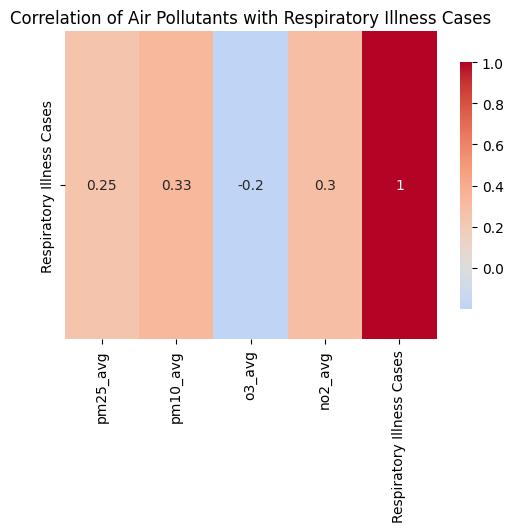

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(respiratory_correlation, annot=True, cmap='coolwarm', center=0, cbar_kws={"shrink": .8})
plt.title('Correlation of Air Pollutants with Respiratory Illness Cases')
plt.ylabel('')
plt.savefig('correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

/var/folders/bs/zhwsxpjn4b1g1b14830j3c_r0000gp/T/ipykernel_2012/4217454490.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/bs/zhwsxpjn4b1g1b14830j3c_r0000gp/T/ipykernel_2012/4217454490.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/bs/zhwsxpjn4b1g1b14830j3c_r0000gp/T/ipykernel_2012/4217454490.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/bs/zhwsxpjn4b1g1b14830j3c_r0000gp/T/ipykernel_2012/4217454490.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

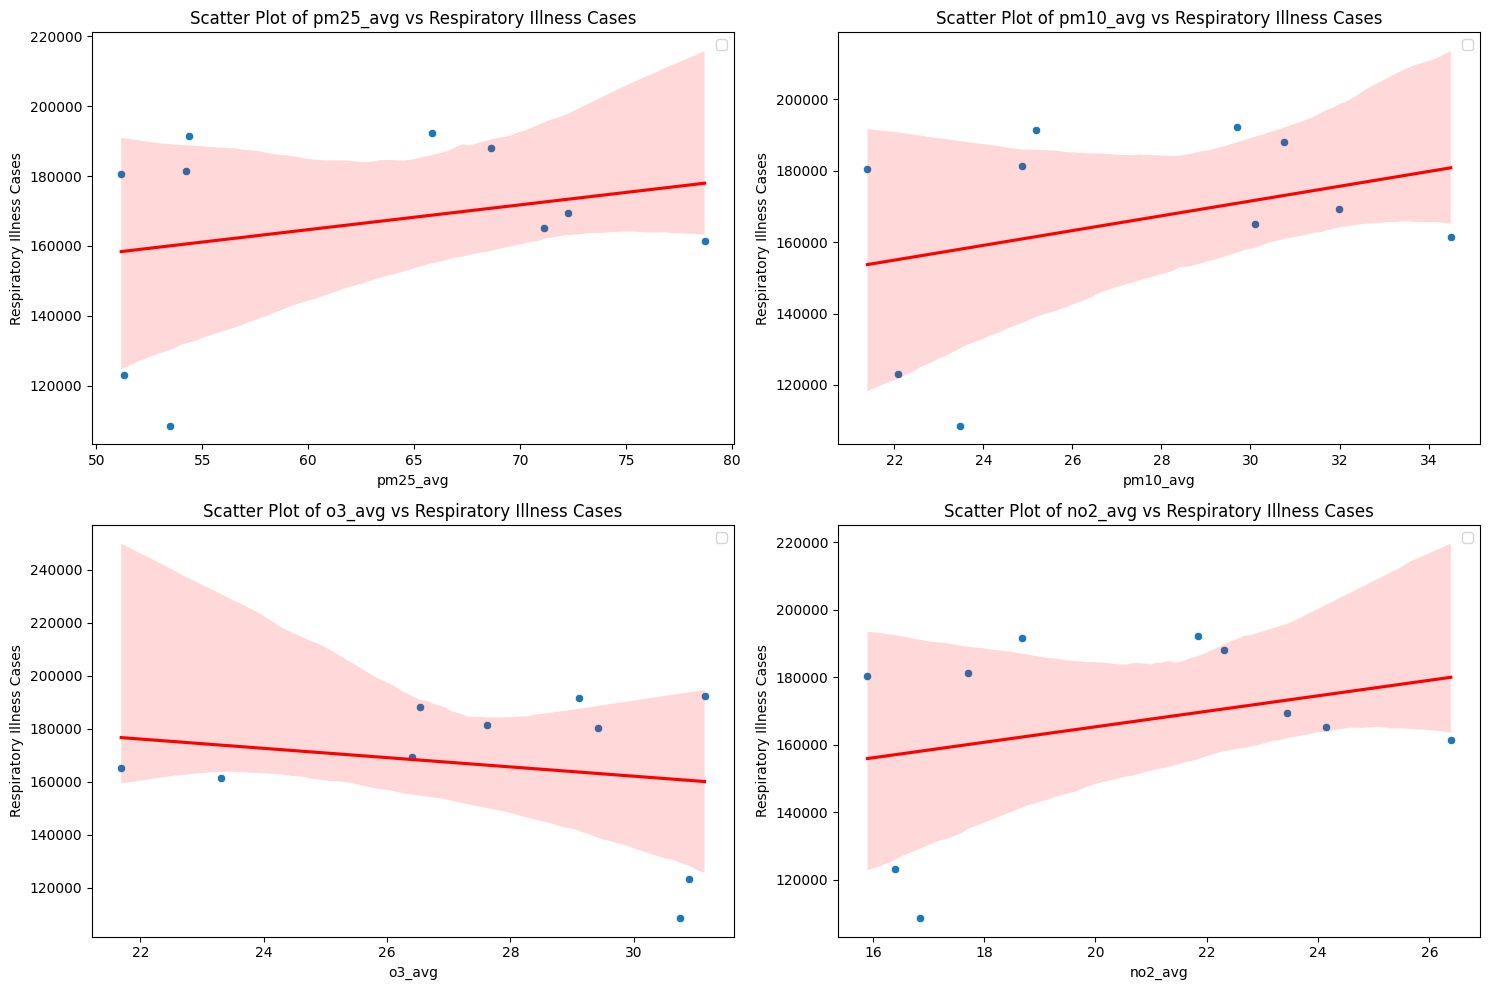

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample merged_data DataFrame (assuming it's already defined)
# merged_data = your_data_here

# List of pollutants to plot against Respiratory Illness Cases
pollutants = ['pm25_avg', 'pm10_avg', 'o3_avg', 'no2_avg']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create scatter plots for each pollutant
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.scatterplot(data=merged_data, x=pollutant, y='Respiratory Illness Cases')
    
    # Add a regression line for better visualization of the trend
    sns.regplot(data=merged_data, x=pollutant, y='Respiratory Illness Cases', scatter=False, color='red', line_kws={"label": "Regression Line"})
    
    plt.title(f'Scatter Plot of {pollutant} vs Respiratory Illness Cases')
    plt.xlabel(pollutant)
    plt.ylabel('Respiratory Illness Cases')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Save the scatter plots image
plt.savefig('scatter_plots_pollutants_vs_respiratory_illness.png', bbox_inches='tight', dpi=300)  # Save as PNG with high resolution

# Show the plots
plt.show()